# CrowdTruth for Sparse Multiple Choice Tasks: Event Extraction

In [1]:
import pandas as pd

file_name = "f1321887_things_nonemotivation"
test_data = pd.read_csv("../../data/pilot_crowd_data/raw_data/" + file_name + ".csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,gold_total_events,hiddeninput_gold,lowercase_sentence,notpossible_gold,original_sentence,processed_sentence,selectedtags_desc_gold,sentence,sentence_id,tokens
0,2015650891,11/17/2018 12:29:01,4255231590,11/17/2018 12:28:52,False,instagc,1.0,8355ff470b1ea18db562b61fa0a306a2,GBR,X4,...,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
1,2015650891,11/17/2018 15:08:52,4255760238,11/17/2018 15:08:21,False,prodege,1.0,e1348a79a458a304fb5c1eaa37e3d459,CAN,ON,...,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
2,2015650891,11/17/2018 15:49:49,4255915530,11/17/2018 15:49:25,False,elite,1.0,e086ba388a4ccda2ad10396b1e55af51,USA,CO,...,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
3,2015650891,11/17/2018 16:26:52,4256060184,11/17/2018 16:26:37,False,wannads,1.0,017bbee01ff77eadfca65e4067b36da3,GBR,H7,...,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
4,2015650891,11/17/2018 17:39:21,4256348235,11/17/2018 17:38:29,False,elite,1.0,fd4c8cbeb7fe01499480d1344c50df5f,CAN,BC,...,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [2]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Relation Extraction task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of all relations that were given as input to the crowd in at least one sentence
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [3]:
class TestConfig(DefaultConfig):
    inputColumns = ["doc_id", "total_events_gold", "sentence", "lowercase_sentence", "sentence_id", "all_runs_events"]
    outputColumns = ["selectedtags_desc"]
    
    annotation_separator = ","
        
    # processing of a closed task
    open_ended_task = True
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [4]:
data_open, config = crowdtruth.load(
    file = "../../data/pilot_crowd_data/raw_data/" + file_name + ".csv",
    config = TestConfig()
)

data_open['judgments'].head()

,output.selectedtags_desc,output.selectedtags_desc.count,output.selectedtags_desc.unique,unit,worker,started,submitted,duration,job
judgment,,,,,,,,,
4255231590,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",6,6,2015650891,8355ff470b1ea18db562b61fa0a306a2,2018-11-17 12:28:52,2018-11-17 12:29:01,9,../../data/pilot_crowd_data/raw_data/f1321887_...
4255760238,"{'informed__37__45': 1, 'investigation__83__96...",3,3,2015650891,e1348a79a458a304fb5c1eaa37e3d459,2018-11-17 15:08:21,2018-11-17 15:08:52,31,../../data/pilot_crowd_data/raw_data/f1321887_...
4255915530,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",5,5,2015650891,e086ba388a4ccda2ad10396b1e55af51,2018-11-17 15:49:25,2018-11-17 15:49:49,24,../../data/pilot_crowd_data/raw_data/f1321887_...
4256060184,{'investigation__83__96': 1},1,1,2015650891,017bbee01ff77eadfca65e4067b36da3,2018-11-17 16:26:37,2018-11-17 16:26:52,15,../../data/pilot_crowd_data/raw_data/f1321887_...
4256348235,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",5,5,2015650891,fd4c8cbeb7fe01499480d1344c50df5f,2018-11-17 17:38:29,2018-11-17 17:39:21,52,../../data/pilot_crowd_data/raw_data/f1321887_...


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [5]:
results_open = crowdtruth.run(data_open, config)

`results` is a dict object that contains the quality metrics for sentences, events and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [6]:
results_open["units"].head()

,duration,input.all_runs_events,input.doc_id,input.lowercase_sentence,input.sentence,input.sentence_id,job,output.selectedtags_desc,output.selectedtags_desc.annotations,output.selectedtags_desc.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,,
2015650891,48.35,informed__37__45###face__69__73###investigatio...,nyt_20130321_sarkozy,former president nicolas sarkozy was informed ...,Former President Nicolas Sarkozy was informed ...,0,../../data/pilot_crowd_data/raw_data/f1321887_...,"{'informed__37__45': 13, 'face__69__73': 10, '...",68,6,20,0.619972,"{'informed__37__45': 0.7505481616498522, 'face...",0.560695,"{'informed__37__45': 0.65, 'face__69__73': 0.5..."
2015650892,53.45,denied__16__22###accepting__23__32###alleged__...,nyt_20130321_sarkozy,mr. sarkozy has denied accepting illegal campa...,Mr. Sarkozy has denied accepting illegal campa...,1,../../data/pilot_crowd_data/raw_data/f1321887_...,"{'denied__16__22': 13, 'accepting__23__32': 11...",57,5,20,0.583948,"{'denied__16__22': 0.7033467072282129, 'accept...",0.532303,"{'denied__16__22': 0.65, 'accepting__23__32': ..."
2015650893,48.45,called__41__47###decision__61__69###indicates_...,nyt_20130321_sarkozy,"mr. sarkozy s lawyer , thierry herzog , called...","Mr. Sarkozy 's lawyer , Thierry Herzog , calle...",2,../../data/pilot_crowd_data/raw_data/f1321887_...,"{'called__41__47': 14, 'decision__61__69': 11,...",76,6,20,0.653827,"{'called__41__47': 0.8048607225531363, 'decisi...",0.576375,"{'called__41__47': 0.7, 'decision__61__69': 0...."
2015650894,53.40,said__11__15###appeal__25__31###appeal .__25__33,nyt_20130321_sarkozy,the lawyer said he would appeal 0,The lawyer said he would appeal .,3,../../data/pilot_crowd_data/raw_data/f1321887_...,"{'said__11__15': 16, 'appeal__25__31': 16, 'ap...",38,3,20,0.746718,"{'said__11__15': 0.8495208359438268, 'appeal__...",0.701504,"{'said__11__15': 0.8, 'appeal__25__31': 0.8, '..."
2015650895,49.90,ruling__4__10###mean__32__36###lost__60__64###...,nyt_20130321_sarkozy,the ruling does not necessarily mean that mr. ...,The ruling does not necessarily mean that Mr. ...,4,../../data/pilot_crowd_data/raw_data/f1321887_...,"{'ruling__4__10': 11, 'mean__32__36': 7, 'lost...",59,6,20,0.514578,"{'ruling__4__10': 0.6140619583466743, 'mean__3...",0.447962,"{'ruling__4__10': 0.55, 'mean__32__36': 0.35, ..."


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentence. Here we plot its histogram:

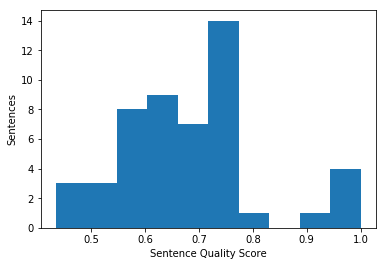

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results_open["units"]["uqs"])
plt.xlabel("Sentence Quality Score")
plt.ylabel("Sentences")


The `unit_annotation_score` column in `results["units"]` contains the **sentence-relation scores**, capturing the likelihood that a relation is expressed in a sentence. For each sentence, we store a dictionary mapping each relation to its sentence-relation score.

In [8]:
results_open["units"]["unit_annotation_score"].head(10)

unit
2015650891    {'informed__37__45': 0.7505481616498522, 'face...
2015650892    {'denied__16__22': 0.7033467072282129, 'accept...
2015650893    {'called__41__47': 0.8048607225531363, 'decisi...
2015650894    {'said__11__15': 0.8495208359438268, 'appeal__...
2015650895    {'ruling__4__10': 0.6140619583466743, 'mean__3...
2015650896    {'accused__23__30': 0.8461306649368339, 'fakin...
2015650897    {'reported__57__65': 0.9297501443186605, 'miss...
2015650898    {'search__31__37': 0.6897280718727955, 'said__...
2015650899    {'pulled__32__38': 0.8406613214651585, 'showed...
2015650900    {'wanted__13__19': 0.7142983350093315, 'collec...
Name: unit_annotation_score, dtype: object

The **worker metrics** are stored in `results["workers"]`:

In [9]:
results_open["workers"].head()

,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
017bbee01ff77eadfca65e4067b36da3,50,50,1,15.480000,0.381919,0.578592,0.660084,0.334222,0.525850,0.635584
07fe811ad57531a29d0ce82daedb4ad7,20,20,1,127.000000,0.469478,0.642676,0.730505,0.412262,0.585548,0.704061
0a3302e56f7d6a1edc99700f53076e2d,22,22,1,23.000000,0.691578,0.770199,0.897921,0.622422,0.708798,0.878137
17d606c5937fce457b0ba0ff23dd12f8,34,34,1,59.411765,0.648760,0.748206,0.867086,0.587415,0.690160,0.851129
19d1cf4672a44a2b873901990979111a,42,42,1,60.238095,0.445312,0.621746,0.716227,0.391671,0.567041,0.690729


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

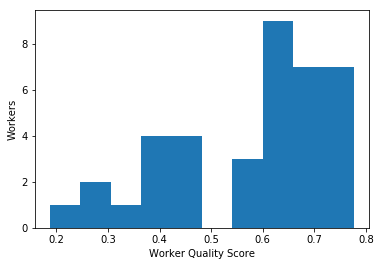

In [10]:
plt.hist(results_open["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

## Save crowd results in a csv file

In [11]:
rows = []
header = list(results_open["units"])
header.extend(["validated_event", "no_of_annotations", "validated_event_final_score", "validated_event_initial_score"])

rows.append(header)

for i in range(len(results_open["units"].index)):
    keys = []
    all_event_runs = results_open["units"]["input.all_runs_events"].iloc[i].lower().split("###")
    keys.extend(all_event_runs)
    keys.append("no_event")
    
    for j in range(len(keys)):
        row = list(results_open["units"].iloc[i])
        row.append(keys[j])
        row.append(results_open["units"]["output.selectedtags_desc"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score_initial"].iloc[i][keys[j].lower()])
    
        rows.append(row)
        
        
import csv

with open('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

## Comparison with Expert Annotations

In [12]:
# expert annotations in TempEval-3 Platinum dataset
import numpy as np
           
expert_data = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_events.csv")
crowd_data = pd.read_csv("../../data/pilot_crowd_data/results/"+ file_name + "_units_open.csv")
crowd_data["Experts"] = pd.Series(np.random.randn(len(crowd_data.index)), index=crowd_data.index)

for i in range(len(crowd_data.index)):
    subset = expert_data[(expert_data["Doc Id"].str.lower() == crowd_data["input.doc_id"].iloc[i].lower()) & (expert_data["Sentence Id"] == crowd_data["input.sentence_id"].iloc[i])]# & (str(str(expert_data["Lowercase Token"]) + "__" + str(expert_data["Start Offset"]) + "__" + str(expert_data["End Offset"])) == str(crowd_data["validated_event"].iloc[i]))]
    found = False
    for j in range(len(subset.index)):
        if str(str(subset["Lowercase Token"].iloc[j]) + "__" + str(subset["Start Offset"].iloc[j]) + "__" + str(subset["End Offset"].iloc[j])) == crowd_data["validated_event"].iloc[i]:
            found = True
    if found == True:
        crowd_data["Experts"].iloc[i] = 1
    else:
        crowd_data["Experts"].iloc[i] = 0
crowd_data.to_csv("../../data/pilot_crowd_data/results/" + file_name + "_units_open.csv", index=False)    


/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
import eval_crowd_results as eval_script

crowd = pd.read_csv('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv')
eval_file = eval_script.compute_crowd_performance(crowd, "validated_event_final_score")
     
with open('../../data/pilot_crowd_data/results/eval_' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(eval_file)
    
eval_main = pd.read_csv("../../data/pilot_crowd_data/results/eval_" + file_name + "_units_open.csv")
eval_main

,Thresh,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-score
0,0.05,162,47,52,0,0.757009,1.000000,0.800766,0.861702
1,0.10,162,50,49,0,0.767773,1.000000,0.812261,0.868633
2,0.15,162,52,47,0,0.775120,1.000000,0.819923,0.873315
3,0.20,162,54,45,0,0.782609,1.000000,0.827586,0.878049
4,0.25,161,56,43,1,0.789216,0.993827,0.831418,0.879781
5,0.30,160,58,41,2,0.796020,0.987654,0.835249,0.881543
6,0.35,159,61,38,3,0.807107,0.981481,0.842912,0.885794
7,0.40,151,70,29,11,0.838889,0.932099,0.846743,0.883041
8,0.45,144,75,24,18,0.857143,0.888889,0.839080,0.872727
9,0.50,136,78,21,26,0.866242,0.839506,0.819923,0.852665
